# Pertemuan 12 Data Science 14
## Sumber : https://youtu.be/z69XYXpvVrE
## Classifiation Task dengan Support Vector Machine (SVM)

### Konsep Dasar
#### Decision Boundary (Hyperplane)
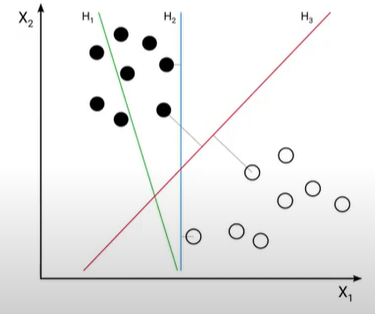

pada gambar diatas terdapat :
- dua kelas hitam dan putih
- dua feature, yaitu X1, X2
- menentukan tiga garis linear (H1, H2, H3)

pada garis linear ini digunakan untuk menentukan garis mana yang baik untuk memisahkan dua kelas tersebut.
- H1 tidak dapat menjadi garis pemisah
- H2 dapat menjadi garis tapi tidak baik
- H3 yang paling baik, margine yang dimiliki H3 lebih baik dari pada H2.

termologi dasar :
- Hyperplane, 
> - bila terdapat dua feature dapat diploting menjadi dua dimensi, jadi decision boundary menjadi garis, 
> - bila hanya satu feature maka hanya menjadi titik atau nilai treshold, 
> - bila ada tiga feature maka hasilnya menjadi bidang datar atau disebut claim, 
> - bila terdapat empat feature maka menjadi multi dimensi atau disebut hyperplane.

#### Maximum Margin
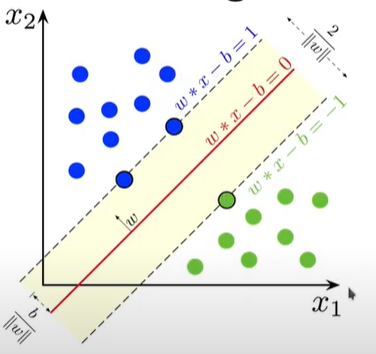

- margin adalah sebuah jarak terdekat terhadap decision boundary dengan anggota class yang ingin dipisahkan. pada gambar yaitu garis area berwarna kuning. 
- setiap anggota kelas yang berperan menentukan margin disebut sebagai support vector


#### Linearly Inseperable & Kernel Tricks
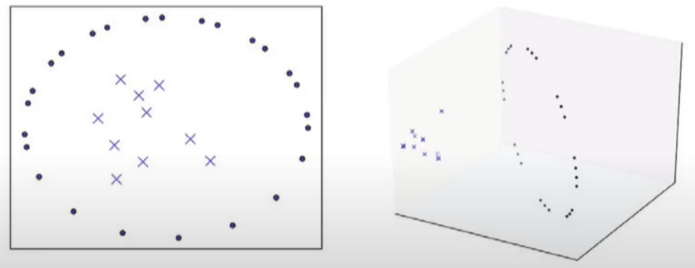

- pada gambar terdapat kelas titik dan X.
- pada bentuk dua dimensi akan menjadi sulit untuk menarik garis yang biasa disebut linearly inseperable.
- maka dari itu SVM akan membuat proyeksi menjadi tiga dimensi (higher dimentions)
- kernel triks, digunakan untuk melakukan proyeksi lain.

### Dataset The MNIST database of handwritten digits
#### Referensi : http://yann.lecun.com/exdb/mnist/

In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', data_home= './mnist', return_X_y=True)
X.shape

(70000, 784)

untuk melakukan download dataset, yaitu dengan menggunakan `fetch_openml`, 
- menyebutkan nama dataset, 
- lalu lokasi untuk menyimpan dataset. 
- lalu melakukan pemisahan target dan feature dengan `return_X_y=True`

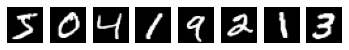

In [4]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

pos = 1
for data in X.to_numpy()[:8]: # 8 baris pertama
    plt.subplot(1, 8, pos)
    plt.imshow(data.reshape((28, 28)), cmap=cm.Greys_r)
    plt.axis('off')
    pos += 1
    
plt.show()    

untuk melakukan import data image yaitu menggunakan `matplotlib.cm`, `cm` yaitu color map.

In [5]:
y[:8]

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

pada bagian ini akan menunjukan angka angka apa saja yang tertera pada data tersebut.

In [15]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

#X_train = X[:1000]
#y_train = y[:1000]
#X_test = X[69000:]
#y_test = X[69000:]

### Classification dengan SVC (Support Vector Classifier)

In [12]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(X_train, y_train)

SVC(random_state=0)

In [16]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Hyperparameter Tuning dengan `GridSearchCV`
setiap training, ada beberapa parameter yang dapat disesuaikan. dalam konteks machine learning parameter yang diguankan untuk mengatur proses training dari suatu model kenal dengan hyperparameter dan proses untuk mencari komposisi nilai optimal dari hasil hyperparameter ini sebut dengan hpyerparmeter tunning.

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel' : ['rbf','poly','sigmoid'],
    'C': [0.5,1,10,100],
    'gamma': ['scale', 1,0.1,0.01,0.001]
    
# mencari tahu kombinasi yang terbaik untuk Support factor
}

grid_search = GridSearchCV(estimator = SVC(random_state = 0),
                          param_grid = parameters,
                          n_jobs=10,
                          verbose=1,
                          scoring = 'accuracy')

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


grid search :
- membentuk object dari CV,
- memasukan param :
> - pertama yaitu estimator yang nilainya object model yang ingin di tentukan
> - param_grid, dimassukan dengan paramter yang diasosiakan
> - n_jobs digunakan untuk menjalankan proses secara pararel dari 6 tread dari processor.
> - verbose digunakan untuk prosesor berjalan kita mendapatkan object informatif.
> - scoring digunakan untuk nilai pembanding yang akan dipakai.

In [ ]:
print(f'Best Score:{grid_search.best_score_}')

best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameters:')
for param in parameters :
    print(f'\t{param}:{best_params[param]}')

mencari score terbaiknya, pertama ,menggunakan `grid_search,best_score_`

### Predict & Evaluate

In [ ]:
y_pred = grid_search.predict(X_test)

print(classification_report(y_test,y_pred))

menamfaatkan object gird_search.